Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [162]:
# Importing the required packages here
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

#Read in the movies csv.
df = pd.read_csv("movies.csv")
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [163]:
#Define function to find percent null values.
def calc_null():
    #Total missing data.
    sum_ = df.isnull().sum().sort_values(ascending=False)

    #Percent missing data.
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)

    #Create a dataframe from total and percent missing.
    missing_df = pd.concat([sum_,percent], axis=1, keys=["Total Missing Data", "Percent Missing Data"])

    return (missing_df)

In [164]:
#Define function to show the null values only.
def show_null(data, column):
    #Create True/False variable.
    t_f_null = pd.isnull(data[column])
    
    #Display only the null in a df.
    return data[t_f_null]

### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [165]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [166]:
#Removing redundent columns from the dataframe.
df= df.drop(["keywords", "original_language", "homepage", "status", "original_title", "overview", "production_companies", "tagline"], axis=1)

In [167]:
calc_null()

,Total Missing Data,Percent Missing Data
runtime,2,0.041641
release_date,1,0.020820
budget,0,0.000000
genres,0,0.000000
id,0,0.000000
popularity,0,0.000000
production_countries,0,0.000000
revenue,0,0.000000
spoken_languages,0,0.000000
title,0,0.000000


In [168]:
show_null(df, "runtime")

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,0.738646,"[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,0.050625,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],"To Be Frank, Sinatra at 100",0.0,0


The two rows with runtime being null dont have any revenue so I will drop these rows.

In [169]:
show_null(df, "release_date")

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
4553,0,[],380097,0.0,[],NaN,0,0.0,[],America Is Still the Place,0.0,0


As does the release date row.

In [170]:
#Drop the rows that have null values as they have other missung values or redundent features.
df = df.dropna()
#No more null values.
calc_null()

,Total Missing Data,Percent Missing Data
budget,0,0.0
genres,0,0.0
id,0,0.0
popularity,0,0.0
production_countries,0,0.0
release_date,0,0.0
revenue,0,0.0
runtime,0,0.0
spoken_languages,0,0.0
title,0,0.0


#### Remove any duplicate rows

In [171]:
#Create a df with all duplicated rows.
df.duplicated().sum()

0

Now duplicated rows found.

#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [172]:
#First check the data types of each column.
df.dtypes

budget                    int64
genres                   object
id                        int64
popularity              float64
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [173]:
#Fine the rows with no budget.
no_budget = df[df["budget"]== 0]
no_budget

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",10588,18.251129,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-11-21,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Cat in the Hat,4.9,366
321,0,"[{""id"": 35, ""name"": ""Comedy""}]",77953,16.460356,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-08-09,104907746,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Campaign,5.6,578
359,0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",258509,27.867368,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-12-17,233755553,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Alvin and the Chipmunks: The Road Chip,5.8,428
406,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 16, ""name...",51052,19.836830,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-02-22,0,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Arthur Christmas,6.7,333
409,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10402, ""n...",16858,5.159407,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1979-12-20,37823676,123.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",All That Jazz,7.3,85
...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,"[{""id"": 18, ""name"": ""Drama""}]",124606,0.918116,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-09-09,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Bang,6.0,1
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",67238,0.022173,[],2005-03-12,0,80.0,[],Cavite,7.5,2
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,1.444476,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Signed, Sealed, Delivered",7.0,6
4801,0,[],126186,0.857008,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Shanghai Calling,5.7,7


In [174]:
#Drope the rows with no budget.
df = df[df["budget"] != 0]

no_budget = df[df["budget"]== 0]
no_budget

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count


In [175]:
#Repeat for no revenue.
df = df[df["revenue"] != 0]

no_budget = df[df["revenue"]== 0]
no_budget

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count


#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [176]:
#Convert the release date column to datetime format.
df["release_date"] = pd.to_datetime(df["release_date"])

#Extract the year from the release date column.
df["release_year"] = df["release_date"].dt.year

In [177]:
df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,2012


#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [178]:
#Convert budget and revenue to np int64 - even though they already are.
df["budget"]= df["budget"].astype(np.int64)

df["revenue"]= df["revenue"].astype(np.int64)

In [179]:
df.dtypes

budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
release_year                     int64
dtype: object

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns

In [180]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(df.index,df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
#parse_col_json('cast', 'name') -- theres no cast column.
parse_col_json('production_countries', 'name')

df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [181]:
#First create a column called profit with the revenue subtracted from the budget.
df["profit"] = df["revenue"] - df["budget"]

#Sort the values in the profit column in decensing order define a var as the top 5 most profitable.
most_prof = df.sort_values("profit", ascending=False).head(5)

#Output the results.
print("The most profitable movies:")
most_prof[["profit", "title"]]

The most profitable movies:


,profit,title
0,2550965087,Avatar
25,1645034188,Titanic
28,1363528810,Jurassic World
44,1316249360,Furious 7
16,1299557910,The Avengers


Text(0.5, 1.0, 'Most Profitable Movies')

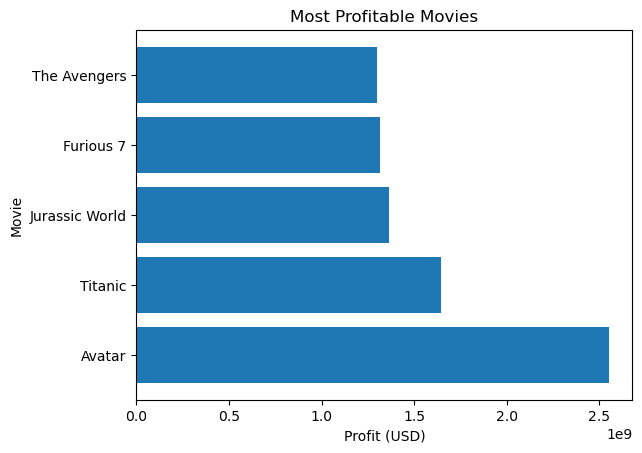

In [182]:
#Create a bar plot with the most profitable movies.
plt.barh(most_prof["title"], most_prof["profit"])

plt.xlabel("Profit (USD)")
plt.ylabel("Movie")
plt.title("Most Profitable Movies")


#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

In [ ]:
from ast import literal_eval

In [219]:
gen_df = df["genres"]
#Make it a list.#
gen_df = gen_df.to_list()

'Action'

In [220]:
list_gen = []
#Iterate through the list row by row.
for i in range(len(gen_df)):
    #I represents the index of the row we are on.
    row = gen_df[i]
    #User literal eval to make it a list instead of a string.
    row = literal_eval(row)
    
    
    #Iterate in the range of the number of items in the row.
    for x in range(len(row)):  
        list_gen.append(row[x])
    
    

In [221]:
len(list_gen)

8559

Text(0.5, 1.0, 'Count of Movies by Genre')

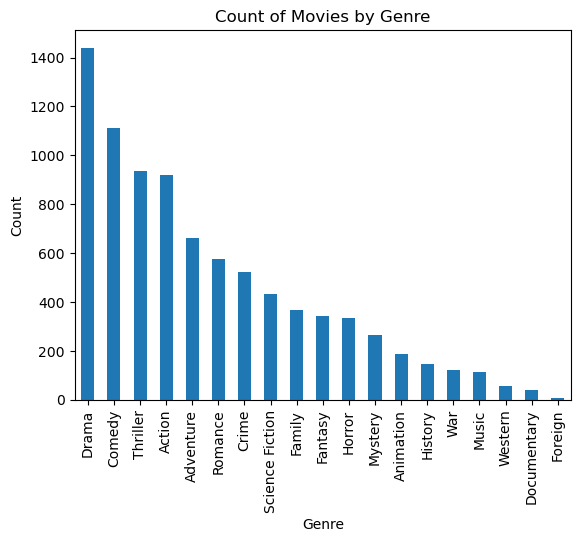

In [226]:
#Make the list a pd series.
genre = pd.Series(list_gen)

gen_counts = genre.value_counts()
#Create a bar plot with the count.
gen_counts.plot(kind="bar")

plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Count of Movies by Genre")

Text(0.5, 1.0, 'Frequency of Movies by Genre')

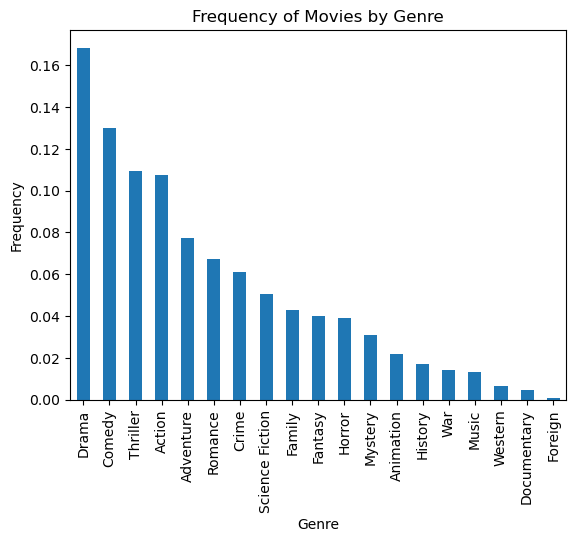

In [227]:
#Create a bar plot with the frequency.
relative_frequency = genre.value_counts(normalize=True)

relative_frequency.plot(kind="bar")

plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.title("Frequency of Movies by Genre")

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)